### Import

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.style.use('ggplot') 

from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(42)

### Load Data

In [155]:
dmf = pd.read_csv('data/yun_data/output/covid_socio_2020.csv')
unemp_covid_df = pd.read_csv('data/yun_data/output/unemployment_covid_2020.csv')
covid_df = pd.read_csv('data/yun_data/output/covid_monthly_2020.csv')
df3 = pd.read_csv('data/yun_data/output/unemp_rate_2020.csv')
df4 = pd.read_csv('data/yun_data/output/cov_unemp_summary.csv')

### Modeling : 

In [156]:
dmf.columns

Index(['Name', 'Postal Code', 'Area size', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner', 'hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio',
       'Testing_Rate', 'deaths_per_population', 'recovered_per_population',
       'confirmed_per_population', 'active_per_population', 'unemp_year_rate'],
      dtype='object')

### Clustering Kmeans -  n_clusters = 2

In [157]:
X = dmf[['Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]

#fit the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

model = KMeans(n_clusters=2, random_state= 5)
model.fit(X_sc)

# Get the labels and centroids for our first clustering model
k2_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k2_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0
 1 0 1 0 1 0 0 1 1 1 1 0 1 1]
Location of centroids: 
[[-0.15712838  0.04455238  0.09200743 -0.37555133 -0.23870529  0.37102786
   0.22889151 -0.62036503  0.83615258 -0.71852174 -0.63485174  0.78577525
   0.45374261  0.01706028 -0.03721614  0.56330268  0.58425333  0.57518259
   0.5948093   0.51372615  0.43478415]
 [ 0.13966967 -0.03960212 -0.08178439  0.3338234   0.21218248 -0.32980254
  -0.20345912  0.55143558 -0.74324674  0.63868599  0.56431266 -0.69846689
  -0.40332676 -0.01516469  0.03308101 -0.5007135  -0.51933629 -0.51127342
  -0.52871938 -0.45664547 -0.3864748 ]]


In [158]:
#create third column
dmf['k2_labels'] = k2_labels
dmf.k2_labels.value_counts()

1    27
0    24
Name: k2_labels, dtype: int64

In [159]:
# Compute the silouette score and visually examine the results.
round(silhouette_score(X_sc, k2_labels),2)

0.21

### Clustering Kmeans -  n_clusters = 3

In [160]:
# Data for clustering
X = dmf[['Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]

#fit the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

model = KMeans(n_clusters=3, random_state= 5)
model.fit(X_sc)

# Get the labels and centroids for our first clustering model
k3_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k3_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [1 0 1 1 2 0 0 0 1 2 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 2 1 0 1 1
 0 1 0 1 0 1 2 0 0 0 0 1 0 0]
Location of centroids: 
[[-0.12411669  0.04519261 -0.02980926  0.4373395   0.3237071  -0.46672199
  -0.2079332   0.55489845 -0.74624423  0.59185822  0.49298739 -0.74461401
  -0.35775859  0.01040654  0.20659208 -0.48024917 -0.50917892 -0.50231557
  -0.51865131 -0.44613741 -0.37848621]
 [ 0.16863727 -0.00657445  0.03423152 -0.50218586 -0.28002433  0.55704753
  -0.09454185 -0.77335957  0.63910355 -0.76636168 -0.66961856  0.87848583
   0.27471491 -0.24098177 -0.02067348  0.11737325  0.09921208  0.09271491
   0.11261795  0.01478517 -0.06835897]
 [-0.0785872  -0.2592361   0.01404475 -0.20623099 -0.63396841  0.10919345
   1.84791048  0.45329784  1.4952939   0.17632039  0.31107943  0.22794045
   0.88317757  1.1975118  -1.23431271  2.50541004  2.78879955  2.77829794
   2.77998928  2.822271    2.81904497]]


In [161]:
#create third column
dmf['k3_labels'] = k3_labels
dmf.k3_labels.value_counts()

0    26
1    21
2     4
Name: k3_labels, dtype: int64

In [162]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X_sc, k3_labels),2)

0.22

### Clustering Kmeans -  n_clusters = 4

In [163]:
# Data for clustering
X = dmf[['Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]

#fit the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

model = KMeans(n_clusters=4, random_state= 5)
model.fit(X_sc)

# Get the labels and centroids for our first clustering model
k4_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k4_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [2 1 2 2 0 1 1 1 3 0 2 1 1 0 2 1 1 2 2 1 1 1 2 1 2 2 1 1 2 1 1 2 0 2 1 0 2
 1 0 1 2 1 2 0 1 1 1 1 2 1 1]
Location of centroids: 
[[-0.08027912 -0.03273236 -0.12169386 -0.29160259 -0.31875494  0.12158732
   0.95470654  0.23451371  0.78940655  0.06338677  0.11005966  0.1350054
   0.25465146  0.5149724  -0.6289173   1.86688632  2.12249141  2.0507893
   2.06389935  2.14687561  1.98740645]
 [-0.12411669  0.04519261 -0.02980926  0.4373395   0.3237071  -0.46672199
  -0.2079332   0.55489845 -0.74624423  0.59185822  0.49298739 -0.74461401
  -0.35775859  0.01040654  0.20659208 -0.48024917 -0.50917892 -0.50231557
  -0.51865131 -0.44613741 -0.37848621]
 [-0.18877219  0.07637551  0.18000208 -0.41011845 -0.20574367  0.47373867
  -0.0699735  -0.97237392  0.85540094 -1.04048407 -0.94157996  1.05373931
   0.53572131 -0.18796236  0.20642552  0.02653295 -0.04913883 -0.03242017
  -0.01011014 -0.15874715 -0.20453092]
 [ 6.99811498 -2.24426494 -1.4331376  -2.35759523 -2.687457

In [164]:
#create third column
dmf['k4_labels'] = k4_labels
dmf.k4_labels.value_counts()

1    26
2    17
0     7
3     1
Name: k4_labels, dtype: int64

In [165]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X_sc, k4_labels),2)

0.22

### Clustering Kmeans -  n_clusters = 6

In [166]:
# Data for clustering
X = dmf[['Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]

#fit the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

model = KMeans(n_clusters=6,random_state= 5)
model.fit(X_sc)

# Get the labels and centroids for our first clustering model
k6_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k6_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [3 0 3 3 1 0 2 2 4 5 3 2 0 5 3 0 0 3 3 2 2 2 5 0 3 3 0 0 3 2 2 3 5 3 0 5 3
 2 5 2 3 0 3 1 0 2 2 2 3 2 0]
Location of centroids: 
[[-2.40545065e-01 -4.96440804e-01  9.54469642e-01  1.26785191e+00
   7.56498798e-01 -8.02928193e-01 -2.68644849e-01  4.04679145e-01
  -1.04106936e+00  5.00220305e-01  8.36192901e-02 -6.23739726e-01
   1.35042442e-01  4.25010436e-02  4.28278812e-01 -3.94813914e-01
  -6.18038534e-01 -5.79506600e-01 -6.80348109e-01 -6.03715366e-01
  -5.44114705e-01]
 [-1.37251189e-01 -1.52016637e+00  9.34978971e-01  3.31610064e-01
  -7.02418055e-01 -2.35490049e-01  2.65985093e+00  6.88288204e-01
   2.19044531e+00  2.91606801e-01  6.08038767e-01  1.99655870e-01
   1.50707366e+00  2.15917273e+00 -1.36774948e+00  3.87944424e+00
   3.41240959e+00  3.70717537e+00  3.37610097e+00  3.10194274e+00
   3.21920724e+00]
 [-2.43209395e-02  5.09449820e-01 -8.73476895e-01 -2.74528271e-01
  -4.72572079e-02 -1.78545252e-01 -1.55894636e-01  6.83657852e-01
  -4.93536

In [167]:
#create third column
dmf['k6_labels'] = k6_labels
dmf.k6_labels.value_counts()

3    16
2    14
0    12
5     6
1     2
4     1
Name: k6_labels, dtype: int64

In [168]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X_sc, k3_labels),2)

0.22

### Clustering Kmeans -  n_clusters = 8

In [169]:
# Data for clustering
X = dmf[['Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]

#fit the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

model = KMeans(n_clusters=8, random_state= 5)
model.fit(X_sc)

# Get the labels and centroids for our first clustering model
k8_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k8_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [6 7 1 6 4 7 5 5 3 2 6 5 7 2 6 7 7 6 6 0 5 5 2 7 6 6 0 7 1 0 5 1 2 6 7 2 6
 5 2 5 6 7 6 4 7 0 5 5 6 7 7]
Location of centroids: 
[[-2.15102257e-01  1.48858803e+00 -1.59393564e+00  1.82209770e-01
   1.28866120e+00 -1.00692455e+00 -9.06366536e-01  3.19358100e-02
  -1.24773600e+00  7.60987184e-01 -1.13781034e-01 -7.24307127e-01
  -5.26665525e-01 -1.10742156e+00  9.05276932e-01 -8.01076976e-01
  -8.43626903e-01 -8.22816028e-01 -8.29329124e-01 -7.95519620e-01
  -6.95137172e-01]
 [-2.34485515e-01  2.52626682e-01  2.23569466e-01  4.71050339e-01
  -2.28639169e-01 -5.49691335e-01  2.38596284e+00 -6.62231125e-01
   1.25105151e+00 -1.00948268e+00 -5.80341015e-01  9.66482302e-01
   8.10254654e-01  2.96908699e-01 -4.59765920e-01 -3.99448093e-01
  -4.26450012e-01 -3.59900797e-01 -3.90454319e-01 -4.30303374e-01
  -3.10058840e-01]
 [-7.91478242e-02  5.35607732e-01 -5.17076047e-01 -4.85111543e-01
  -1.03819236e-01  2.60041334e-01  1.15446739e-01  5.08430806e-02
   1.11253

In [170]:
#create third column
dmf['k8_labels'] = k8_labels
dmf.k8_labels.value_counts()

6    13
7    12
5    10
2     6
0     4
1     3
4     2
3     1
Name: k8_labels, dtype: int64

In [171]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X_sc, k8_labels),2)

0.22

### Clustering Kmeans -  n_clusters = 10

In [172]:
# Data for clustering
X = dmf[['Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]

#fit the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

model = KMeans(n_clusters=10, random_state= 5)
model.fit(X_sc)

# Get the labels and centroids for our first clustering model
k10_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k10_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [6 4 8 6 5 9 2 2 3 1 6 2 9 1 0 9 9 0 6 7 2 2 0 9 6 0 7 9 8 7 2 8 1 0 9 1 0
 9 1 2 6 9 0 5 4 7 2 9 0 9 9]
Location of centroids: 
[[-1.74422621e-01  1.71477704e-01  2.13537503e-02 -2.95871170e-01
   3.57544764e-01  2.00915953e-02 -5.93988251e-01 -6.56829048e-01
   4.71354654e-01 -9.68308963e-01 -9.09575102e-01  7.27634725e-01
   2.47127670e-01 -4.89210956e-01  4.38248226e-01  1.24600363e-01
   6.01589069e-02  1.01625374e-01  1.78544332e-01 -6.96879596e-03
  -7.95348940e-02]
 [-5.74902898e-02  5.62241242e-01 -5.44362986e-01 -5.40887652e-01
  -1.65289698e-01  2.64418268e-01  2.72648782e-01  5.30039115e-02
   2.28991053e-01 -2.79012488e-02 -8.91319846e-02  1.09145209e-01
  -2.46317415e-01 -1.42707729e-01 -3.33384425e-01  1.06186315e+00
   1.60652413e+00  1.38823488e+00  1.53901870e+00  1.76484876e+00
   1.49468614e+00]
 [ 1.09671328e-01  2.52626682e-01 -6.36456409e-01 -5.94671758e-01
  -7.97039617e-01  3.17879382e-01  1.15851899e-01  8.01731827e-01
  -1.72130

In [173]:
#create third column
dmf['k10_labels'] = k10_labels
dmf.k10_labels.value_counts()

9    12
2     8
0     8
6     6
1     5
7     4
8     3
5     2
4     2
3     1
Name: k10_labels, dtype: int64

In [174]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X_sc, k10_labels),2)

0.19

### Evaluation

We decided to use c_clusters = 3

In [175]:
dmf[['Name','k3_labels']].sort_values('k3_labels')

,Name,k3_labels
50,Wyoming,0
30,New Jersey,0
29,New Hampshire,0
27,Nebraska,0
26,Montana,0
49,Wisconsin,0
23,Minnesota,0
37,Oregon,0
21,Massachusetts,0
20,Maryland,0


#### States in cluster 0

In [176]:
dmf[dmf['k3_labels']== 0]['Name'].values

array(['Alaska', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Idaho',
       'Iowa', 'Kansas', 'Maine', 'Maryland', 'Massachusetts',
       'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey',
       'North Dakota', 'Oregon', 'Rhode Island', 'South Dakota', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'Wisconsin', 'Wyoming'],
      dtype=object)

#### States in cluster 1

In [177]:
dmf[dmf['k3_labels']== 1]['Name'].values

array(['Alabama', 'Arizona', 'Arkansas', 'District of Columbia',
       'Georgia', 'Illinois', 'Indiana', 'Kentucky', 'Louisiana',
       'Michigan', 'Mississippi', 'Missouri', 'Nevada', 'New Mexico',
       'North Carolina', 'Ohio', 'Oklahoma', 'Pennsylvania',
       'South Carolina', 'Tennessee', 'West Virginia'], dtype=object)

#### States in cluster 2

In [178]:
dmf[dmf['k3_labels']== 2]['Name'].values

array(['California', 'Florida', 'New York', 'Texas'], dtype=object)

### Social Features

<ipython-input-179-c5db125344fc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k3['k3_labels']=k3_labels


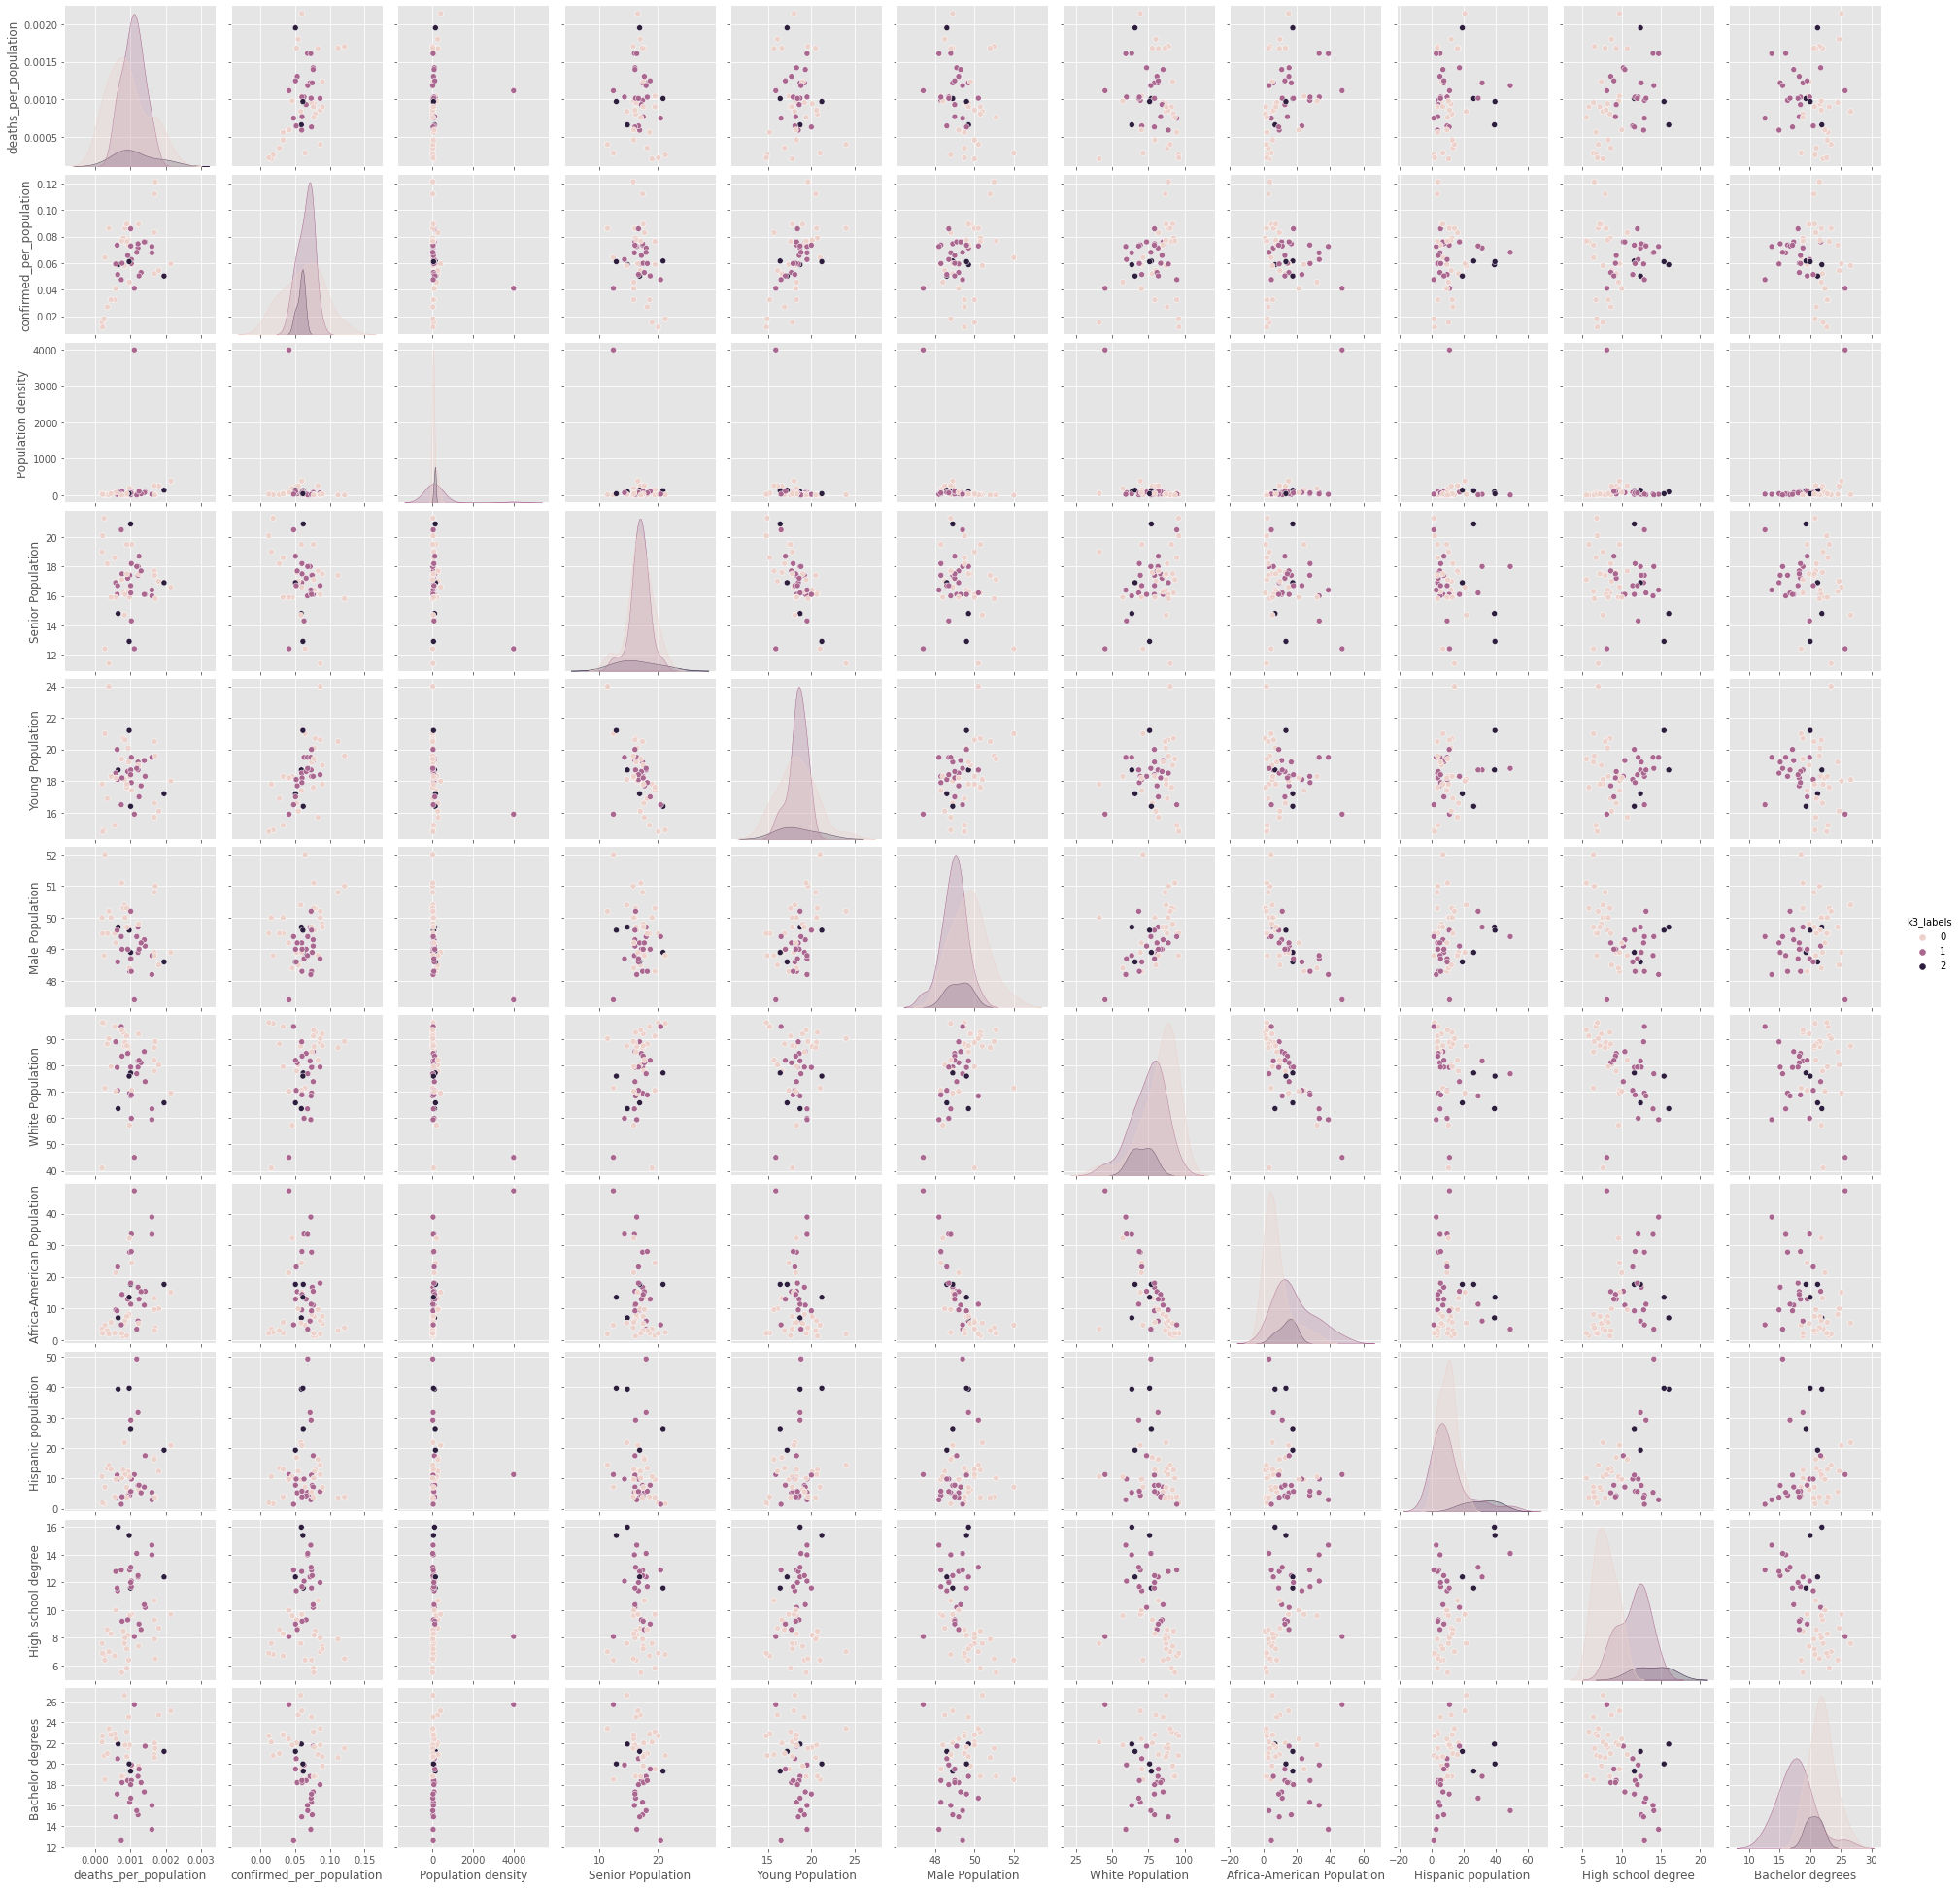

In [179]:
# visually examine the cluster that have been created
k3 = dmf[['deaths_per_population','confirmed_per_population','Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population','High school degree',
       'Bachelor degrees']]
k3['k3_labels']=k3_labels

sns.pairplot(data=k3, hue='k3_labels');

### Economic Features

<ipython-input-180-6cc00ac2a400>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k3['k3_labels']=k3_labels


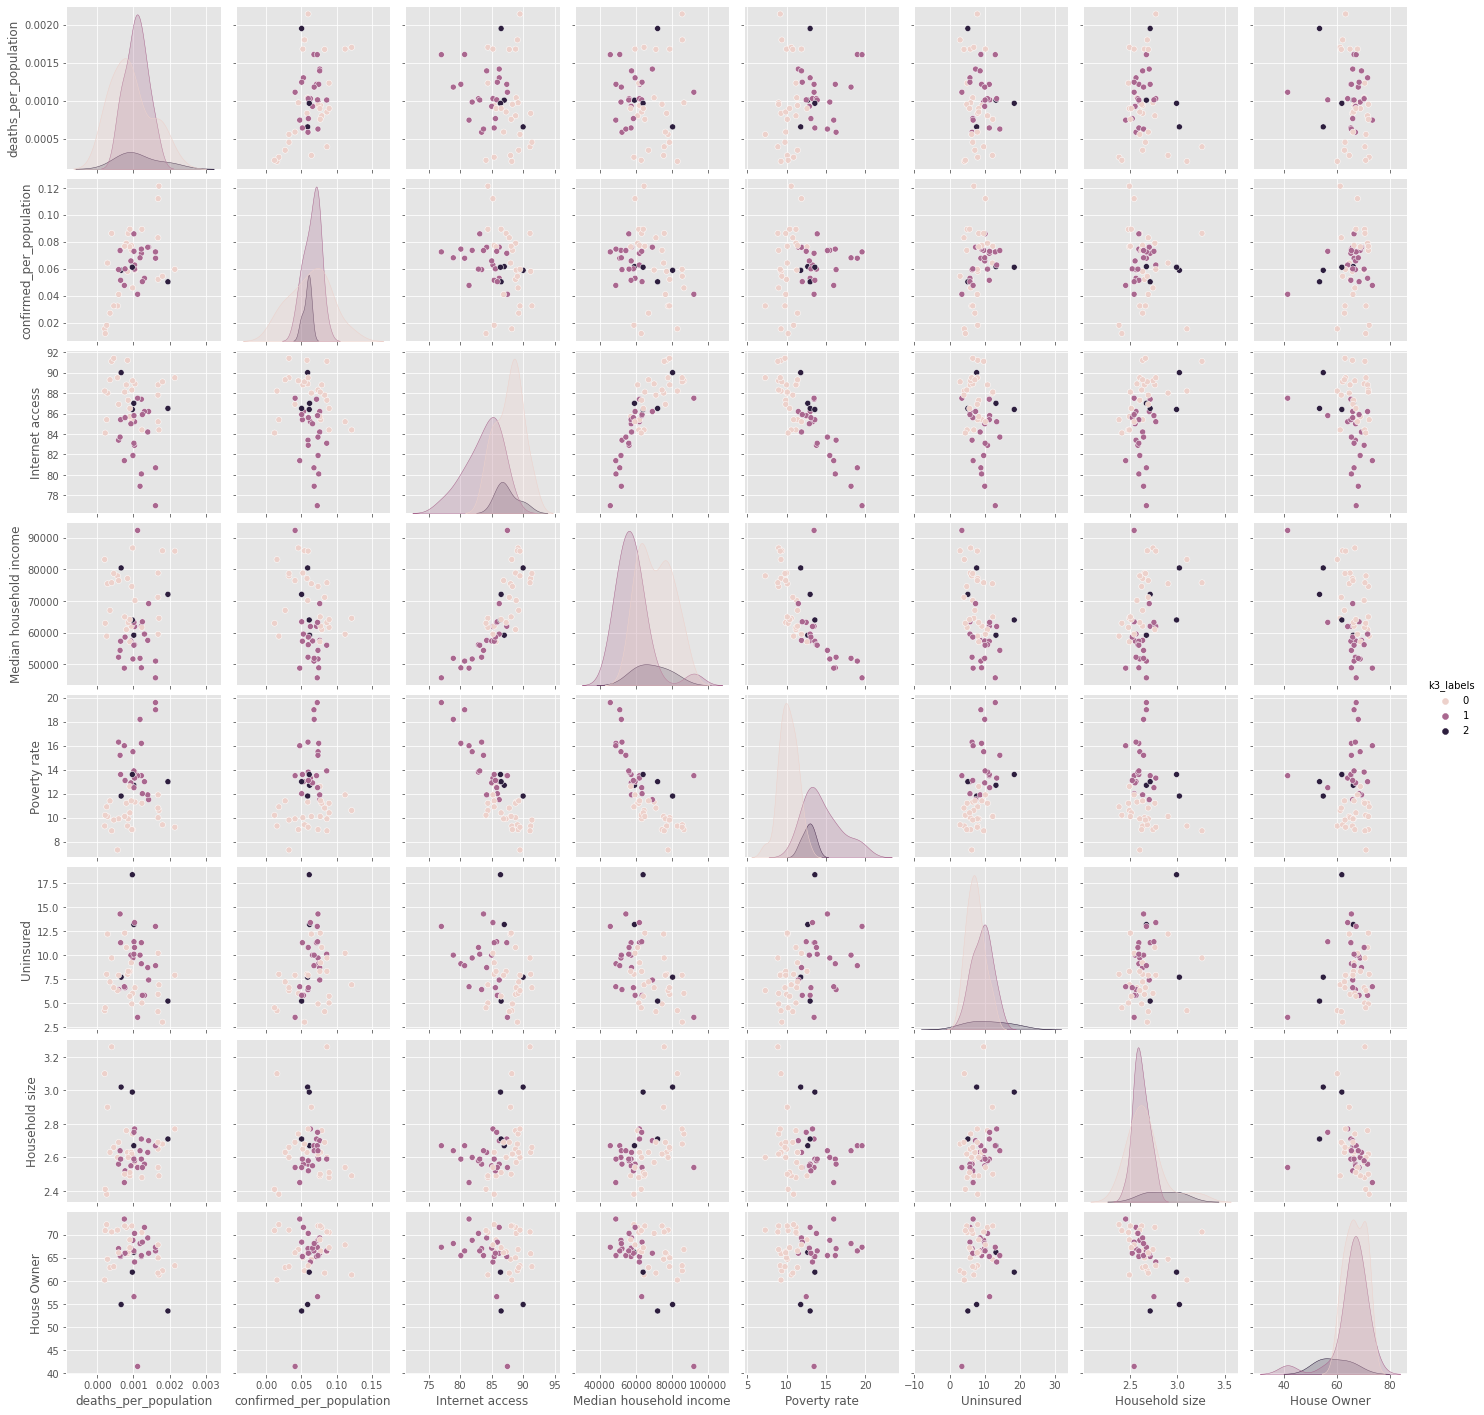

In [180]:
# visually examine the cluster that have been created
k3 = dmf[['deaths_per_population','confirmed_per_population','Internet access', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner']]
k3['k3_labels']=k3_labels

sns.pairplot(data=k3, hue='k3_labels');

### Medical Features

<ipython-input-181-5ea52e4b3d8b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k3['k3_labels']=k3_labels


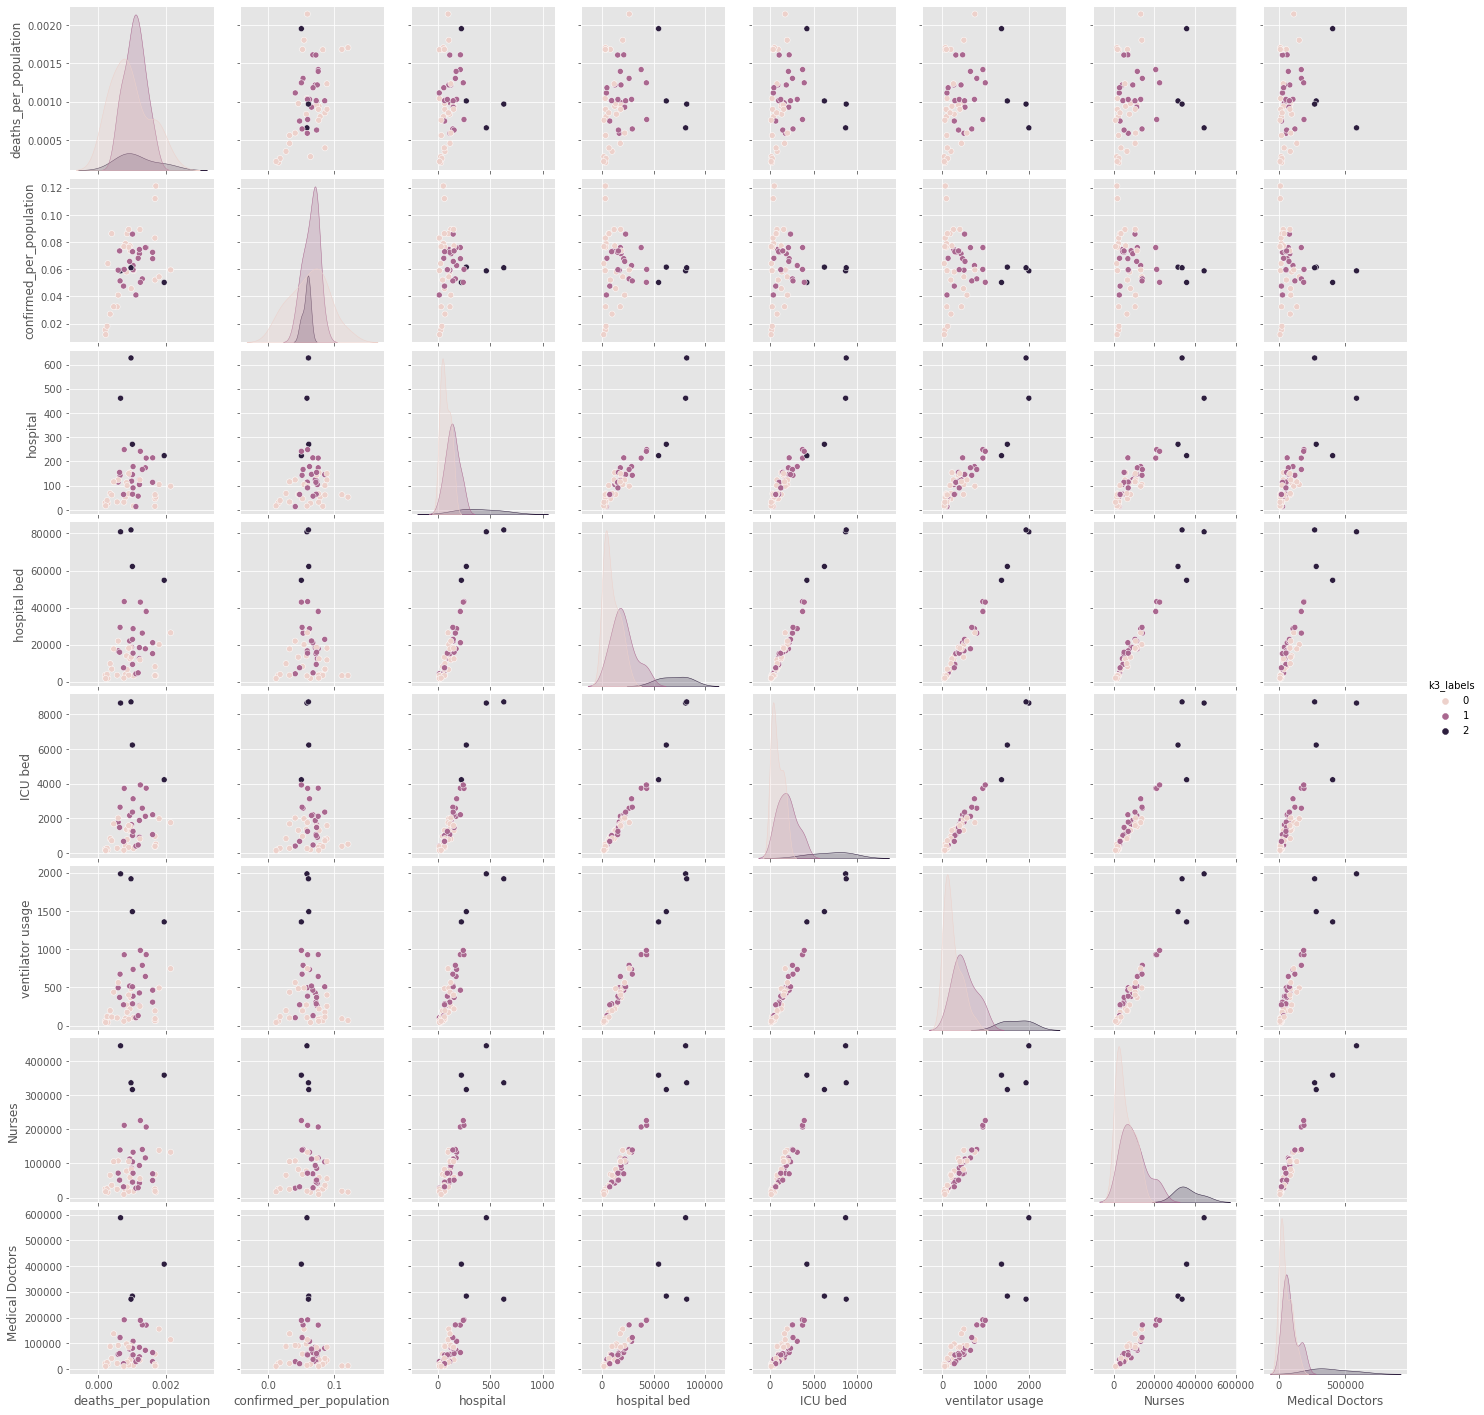

In [181]:
# visually examine the cluster that have been created
k3 = dmf[['deaths_per_population','confirmed_per_population','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]
k3['k3_labels']=k3_labels

sns.pairplot(data=k3, hue='k3_labels');

### Covid-19

<ipython-input-182-80148a2a471e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k3['k3_labels']=k3_labels


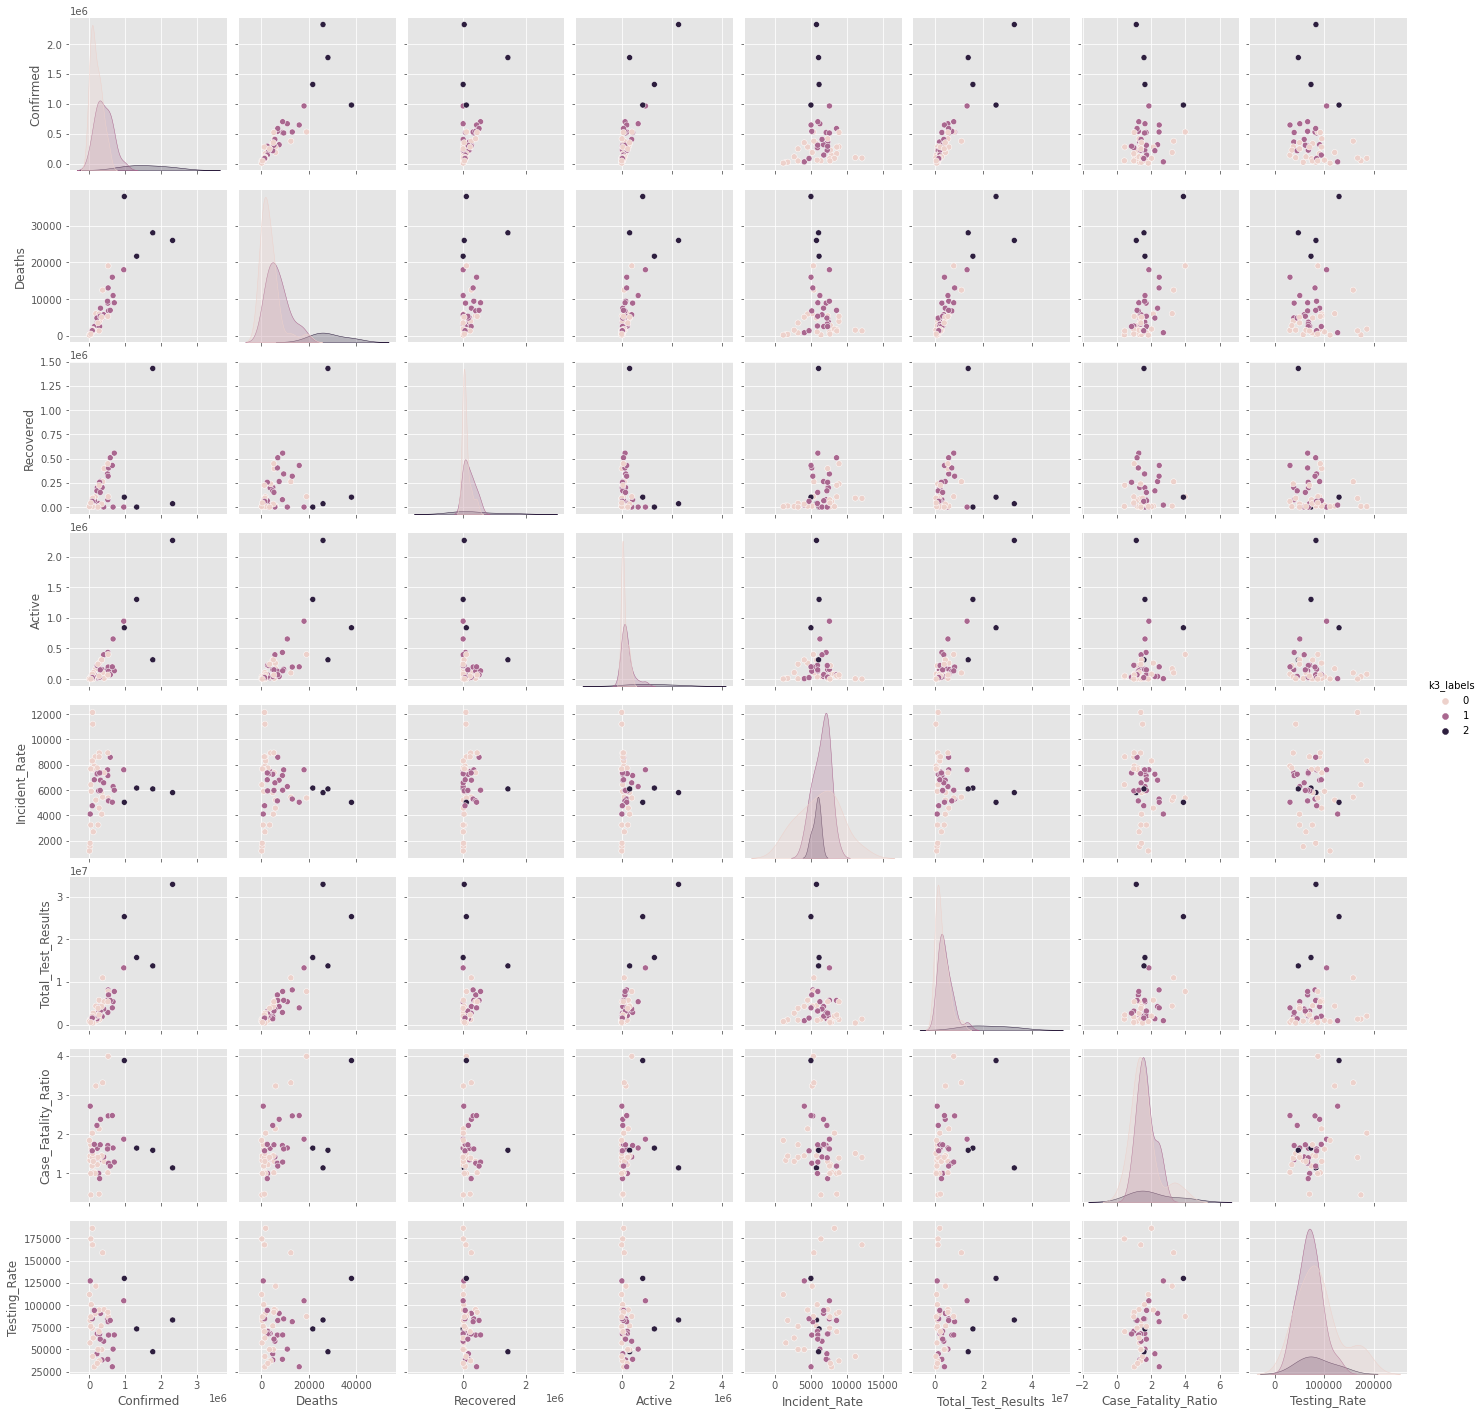

In [182]:
# visually examine the cluster that have been created
k3 = dmf[[ 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio',
       'Testing_Rate']]
k3['k3_labels']=k3_labels

sns.pairplot(data=k3, hue='k3_labels');

### Our cluster and The number of covid-19 cases and mortality

<ipython-input-194-cac80b797b84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k3['k3_labels']=k3_labels


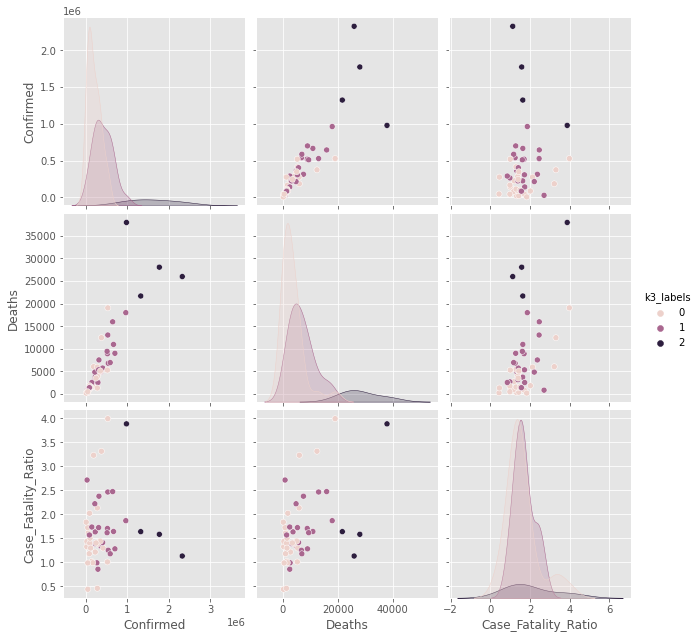

In [194]:
# visually examine the cluster that have been created
k3 = dmf[[ 'Confirmed', 'Deaths','Case_Fatality_Ratio']]
k3['k3_labels']=k3_labels


sns.pairplot(data=k3, hue='k3_labels', height= 3 );

<ipython-input-184-5ecac15854d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k3['k3_labels']=k3_labels


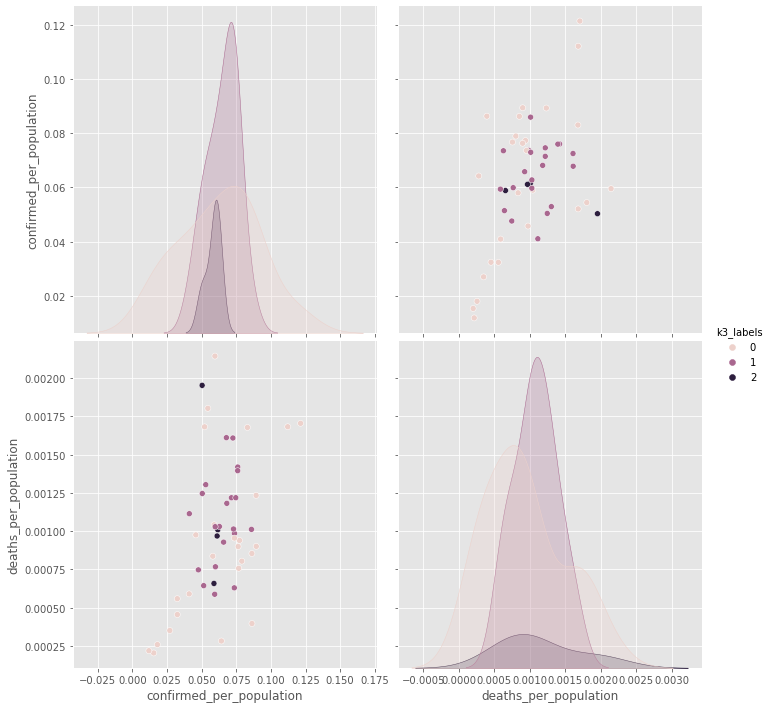

In [184]:
# visually examine the cluster that have been created
k3 = dmf[[ 'confirmed_per_population', 'deaths_per_population']]
k3['k3_labels']=k3_labels


sns.pairplot(data=k3, hue='k3_labels', height= 5 );

<ipython-input-191-1eb6dea0c87e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k3['k3_labels']=k3_labels


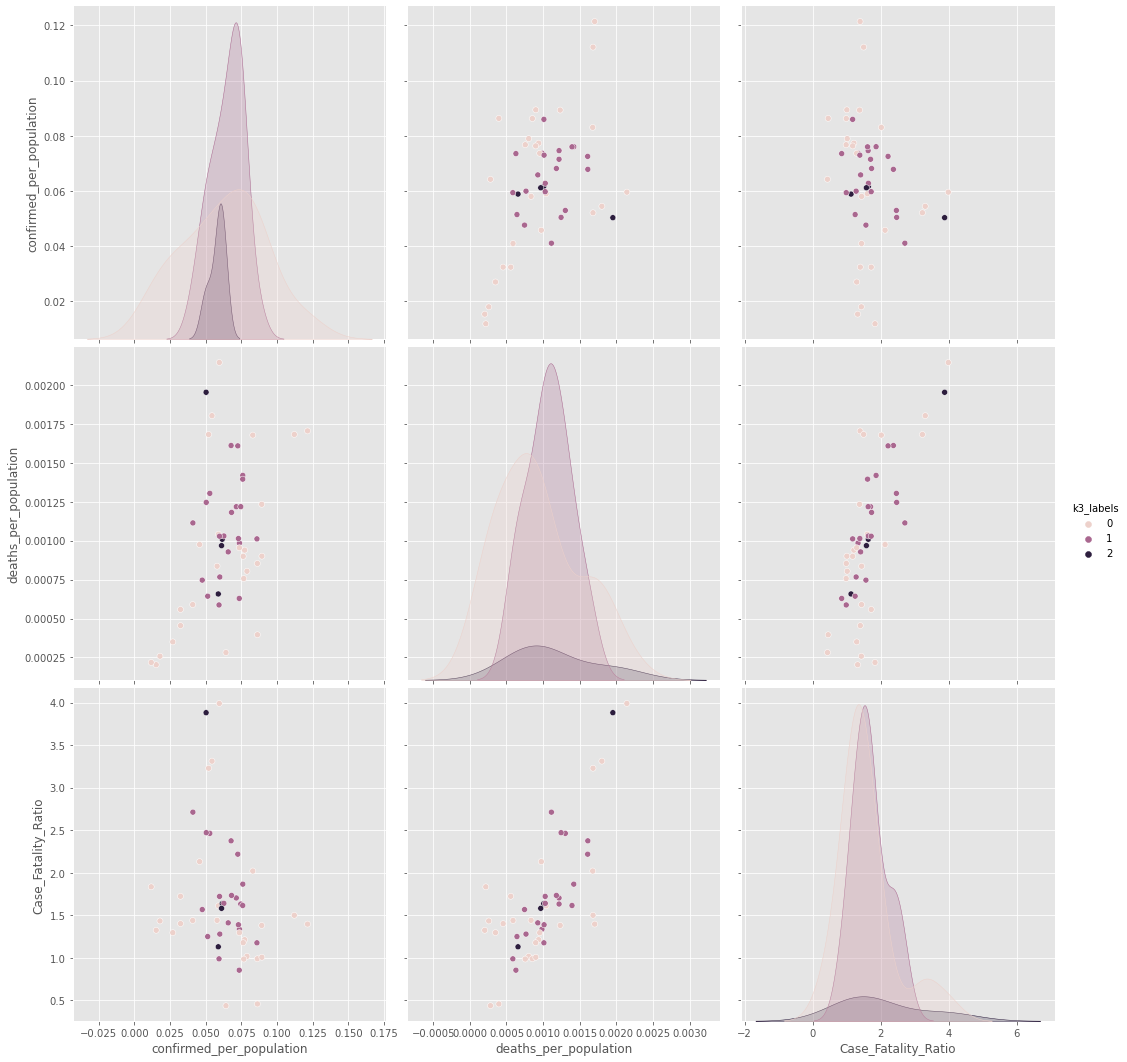

In [191]:
# visually examine the cluster that have been created
k3 = dmf[[ 'confirmed_per_population', 'deaths_per_population','Case_Fatality_Ratio']]
k3['k3_labels']=k3_labels


sns.pairplot(data=k3, hue='k3_labels', height= 5 );

There is no perfect way to evaluate clustering if we don't have the labels, 

In [185]:
dmf.columns

Index(['Name', 'Postal Code', 'Area size', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner', 'hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio',
       'Testing_Rate', 'deaths_per_population', 'recovered_per_population',
       'confirmed_per_population', 'active_per_population', 'unemp_year_rate',
       'k2_labels', 'k3_labels', 'k4_labels', 'k6_labels', 'k8_labels',
       'k10_labels'],
      dtype='object')

In [186]:
# Data for clustering
X = dmf[['Area size','Population size','Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]

#fit the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

model = KMeans(n_clusters=3, random_state= 5)
model.fit(X_sc)

# Get the labels and centroids for our first clustering model
k3a_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k3a_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [2 1 2 2 0 1 1 1 1 0 2 1 1 2 2 1 1 2 2 1 1 1 2 1 2 2 1 1 2 1 1 2 0 2 1 2 2
 1 2 1 2 1 2 0 1 1 1 1 2 1 1]
Location of centroids: 
[[ 0.66374602  2.87093576 -0.0785872  -0.2592361   0.01404475 -0.20623099
  -0.63396841  0.10919345  1.84791048  0.45329784  1.4952939   0.17632039
   0.31107943  0.22794045  0.88317757  1.1975118  -1.23431271  2.50541004
   2.78879955  2.77829794  2.77998928  2.822271    2.81904497]
 [ 0.00307095 -0.43853581  0.13966967 -0.03960212 -0.08178439  0.3338234
   0.21218248 -0.32980254 -0.20345912  0.55143558 -0.74324674  0.63868599
   0.56431266 -0.69846689 -0.40332676 -0.01516469  0.03308101 -0.5007135
  -0.51933629 -0.51127342 -0.52871938 -0.45664547 -0.3864748 ]
 [-0.13689499  0.01783619 -0.17283661  0.10531008  0.10759997 -0.40941539
  -0.15965267  0.42339474 -0.09491228 -0.8350976   0.70432432 -0.89749017
  -0.82403798  0.89734221  0.36785561 -0.21903003  0.20220318  0.17488121
   0.14334408  0.13455952  0.1577733   0.05201718 

In [187]:
#create third column
dmf['k3a_labels'] = k3a_labels
dmf.k3_labels.value_counts()

0    26
1    21
2     4
Name: k3_labels, dtype: int64

In [188]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X_sc, k3a_labels),2)

0.21

<ipython-input-190-a9a5c97a03f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k2['k2_labels']=k2_labels


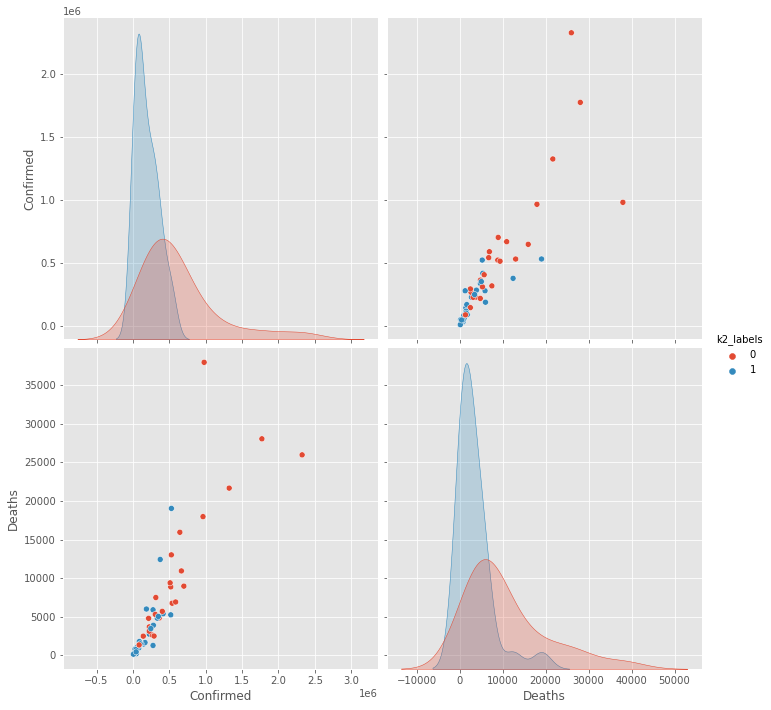

In [190]:
# visually examine the cluster that have been created
k2 = dmf[[ 'Confirmed', 'Deaths']]
k2['k2_labels']=k2_labels


sns.pairplot(data=k2, hue='k2_labels', height= 5 );

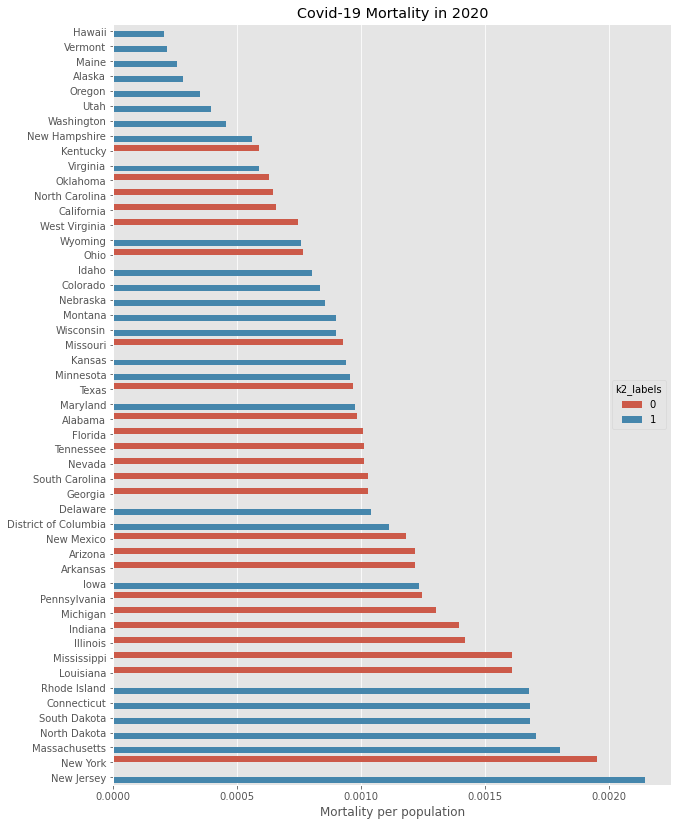

In [149]:
plt.figure(figsize=(10,14)) 

#clrs = ['grey' if (x < dmf.deaths_per_population.mean()) else 'red' for x in dmf['deaths_per_population'].sort_values()]
sns.barplot(x='deaths_per_population', y= 'Name', data=dmf.sort_values('deaths_per_population'),hue = 'k2_labels')         
plt.title('Covid-19 Mortality in 2020')
plt.ylabel('')
plt.xlabel('Mortality per population');